In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('D:/Semester 3/Data Mining/heart_disease_uci.csv')

In [3]:
display(df.isnull)

<bound method DataFrame.isnull of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  Fal

In [4]:
# 1. Identifikasi Missing Values
missing_values=df.isnull().sum().reset_index()
missing_values.columns=['column', 'Misiing Values']
print ('\nNilai yang Hilang :')
print (tabulate(missing_values) )



Nilai yang Hilang :
--  --------  ---
 0  id          0
 1  age         0
 2  sex         0
 3  dataset     0
 4  cp          0
 5  trestbps   59
 6  chol       30
 7  fbs        90
 8  restecg     2
 9  thalch     55
10  exang      55
11  oldpeak    62
12  slope     309
13  ca        611
14  thal      486
15  num         0
--  --------  ---


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Statistik Deskriptif Awal:
               id         age    trestbps        chol      thalch     oldpeak  \

C:\Users\Dafa\AppData\Local\Temp\ipykernel_6736\865718938.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))


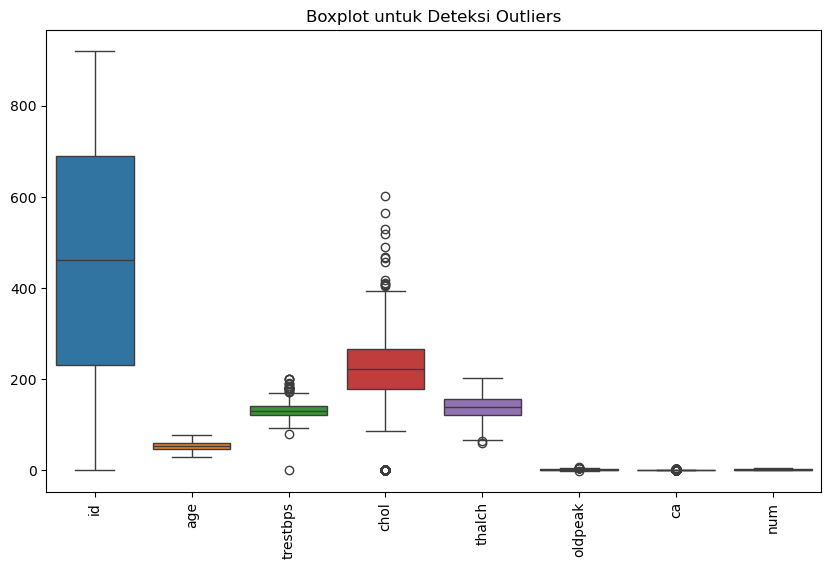


Data Setelah Preprocessing:
         id       age  sex  dataset  cp  trestbps      chol    fbs  restecg  \
0 -1.730169  1.007386    1        0   3  0.698041  0.311021   True        0   
1 -1.726404  1.432034    1        0   0  1.511761  0.797713  False        0   
2 -1.722639  1.432034    1        0   0 -0.658158  0.274289  False        0   
3 -1.718873 -1.752828    1        0   2 -0.115679  0.467130  False        1   
4 -1.715108 -1.328180    0        0   1 -0.115679  0.044717  False        0   

     thalch  exang   oldpeak  slope        ca  thal       num  
0  0.495698  False  1.349421      0 -1.249371     0 -0.871794  
1 -1.175955   True  0.589832      1  4.292099     1  0.879408  
2 -0.340128   True  1.634267      1  2.444942     2  0.003807  
3  1.968345  False  2.488805      0 -1.249371     1 -0.871794  
4  1.371326  False  0.494884      2 -1.249371     1 -0.871794  

Informasi Setelah Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data c

In [5]:
print("Informasi Data:")
print(df.info())
print("\nStatistik Deskriptif Awal:")
print(df.describe())

# 2. Menangani Missing Values
# Imputasi mean untuk kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))

# Imputasi modus untuk kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# 3. Encoding Data Kategorikal
# Contoh: Mengubah 'sex' menjadi 0 dan 1
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})

# Encoding untuk kolom kategorikal lain yang mungkin ada
for col in categorical_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# 4. Menangani Outliers
# Menampilkan boxplot untuk identifikasi outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot untuk Deteksi Outliers')
plt.xticks(rotation=90)
plt.show()

# Contoh penghapusan outliers jika dibutuhkan (opsional)
# df = df[(np.abs(df[numeric_cols] - df[numeric_cols].mean()) <= (3 * df[numeric_cols].std())).all(axis=1)]

# 5. Normalisasi Data
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 6. Tampilkan Data Setelah Preprocessing
print("\nData Setelah Preprocessing:")
print(df.head())

# 7. Memeriksa Informasi Akhir
print("\nInformasi Setelah Preprocessing:")
print(df.info())

# Imputasi modus untuk kolom kategorikal
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Menggunakan infer_objects() untuk memastikan tipe data setelah imputasi
df[categorical_cols] = df[categorical_cols].infer_objects(copy=False)

In [6]:
!pip install scikit-learn

In [7]:
mean_value = df["chol"].mean()
mean_value

-1.8535897454611308e-16

In [8]:
df["chol"] = df['chol'].fillna(mean_value)
df["trestbps"]=df['trestbps'].fillna(mean_value)
df["fbs"]=df['fbs'].fillna(mean_value)
df["restecg"]=df['restecg'].fillna(mean_value)
df["thalch"]=df['thalch'].fillna(mean_value)
df["exang"]=df['exang'].fillna(mean_value)
df["oldpeak"]=df['oldpeak'].fillna(mean_value)
df["slope"]=df['slope'].fillna(mean_value)
df["ca"]=df['ca'].fillna(mean_value)
df["thal"]=df['thal'].fillna(mean_value)

In [9]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
df1 = df.dropna()
df1.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64